## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis?
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?

## Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.pipeline import Pipeline
from scipy.stats import skew

## Importing the dataset

In [2]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1qqxIHFBPBelOOcaPtahIUU43IFPpci5_EFsKf0w8ow8/export?format=csv&gid=1580354176')
data.head()

<ipython-input-2-23fd342aef0a>:1: DtypeWarning: Columns (1,4,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://docs.google.com/spreadsheets/d/1qqxIHFBPBelOOcaPtahIUU43IFPpci5_EFsKf0w8ow8/export?format=csv&gid=1580354176')


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475.489,4.001.952,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,217.0,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453.917,39.881.534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,667.0,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561.978,39.877.145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.5,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,11.643.801,40.076.114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,273.0,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428.392,39.886.229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,333.0,0.0,1.0,1.0,1,62588.0


## **1 About the Data**

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

### **1.1 Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.**

- With this housing dataset, we'll be trying to predict the final price, focusing more on interpretation, making our model less complex and trying to find the balance between variance and bias.

### **1.2 Brief description of the data set you chose and a summary of its attributes**
Dataset
- Housing price of Beijing from 2011 to 2017, fetching from Lianjia.com

Parameters ( copied from the kaggle page )
- url: the url which fetches the data
- id: the id of transaction
- Lng: and Lat coordinates, using the BD09 protocol.
- Cid: community id
- tradeTime: the time of transaction
- DOM: active days on market.Know more in https://en.wikipedia.org/wiki/Days_on_market
- followers: the number of people follow the transaction.
- totalPrice: the total price
- price: the average price by square
- square: the square of house
- livingRoom: the number of living room
- drawingRoom: the number of drawing room
- kitchen: the number of kitchen
- bathroom the number of bathroom
- floor: the height of the house. I will turn the Chinese characters to English in the next version.
- buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ).
- constructionTime: the time of construction
- renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 )
- buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).
- ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.
- elevator: have ( 1 ) or not have elevator( 0 )
- fiveYearsProperty: if the owner have the property for less than 5 years.
- subway: if it has subway ( 1 ) or not ( 0 ).
- disctrict: Number of district (?) could not find a legend for this parameter
- communityAverage: The community average price

### **1.3 Brief summary of data exploration and actions taken for data cleaning and feature engineering.**

Looking at the columns there are a lot of useless columns that we can safely remove, like ['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'floor', 'ladderRatio']

Obs* I'm going to be removing the 'floor' parameter because it's not translated and it's not decoded correctly

In [3]:
data.columns

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')

In [4]:
data = data.drop(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'floor', 'ladderRatio'], axis=1)

Looking at the data types from our dataset

In [5]:
data.dtypes.value_counts()

float64    8
int64      6
object     4
dtype: int64

A lot of NaN values, almost all of them are categorical, except the DOM that correspond the active days on market and communityAverage which correspond to the average value around that area, the categorical ones we can change to zero, the community average we can fill with the mean value based on district, and DOM maybe change to 0 too since i cant really base that information on what we have.

In [6]:
data.isna().any()

DOM                     True
followers              False
totalPrice             False
price                  False
square                 False
livingRoom             False
drawingRoom            False
kitchen                False
bathRoom               False
buildingType            True
constructionTime       False
renovationCondition    False
buildingStructure      False
elevator                True
fiveYearsProperty       True
subway                  True
district               False
communityAverage        True
dtype: bool

There's only one record in which the district is NaN, maybe the best option here is to remove him altogether, i cant really assign a district here to him so i'm going to just remove it and then take care of the communityAverage

In [7]:
data[data['district'].isna() == True]

,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district,communityAverage


In [8]:
data = data[data['district'].isna() != True]

Print out the mean value of the communityAverage without those with NaN values

In [9]:
data[data.isna()['communityAverage'] != True].groupby(['district'])[['communityAverage']].mean()

,communityAverage
district,
1,89921.007318
2,54991.778577
3,47452.024044
4,44408.867895
5,35698.300948
6,43015.549399
7,62909.275219
8,79657.974463
9,50593.793580


In [10]:
df_without_na = data

Adding the mean value per district to those NaN values inside communityAverage

In [11]:
df_without_na['communityAverage'] = df_without_na['communityAverage'].fillna(df_without_na.groupby(['district'])['communityAverage'].transform('mean'))

Now we have just a few more, those that are left they are categorical and we can assign them all to 0

In [12]:
df_without_na.isna().any()

DOM                     True
followers              False
totalPrice             False
price                  False
square                 False
livingRoom             False
drawingRoom            False
kitchen                False
bathRoom               False
buildingType            True
constructionTime       False
renovationCondition    False
buildingStructure      False
elevator                True
fiveYearsProperty       True
subway                  True
district               False
communityAverage       False
dtype: bool

In [13]:
df_without_na['DOM'] = df_without_na['DOM'].fillna(0)
df_without_na['buildingType'] = df_without_na['buildingType'].fillna(0)
df_without_na['elevator'] = df_without_na['elevator'].fillna(0)
df_without_na['fiveYearsProperty'] = df_without_na['fiveYearsProperty'].fillna(0)
df_without_na['subway'] = df_without_na['subway'].fillna(0)

Looking at the data types, it seems like we have columns in which it should be int64 but is object

In [14]:
df_without_na.dtypes

DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
buildingType           float64
constructionTime        object
renovationCondition      int64
buildingStructure        int64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object

Looking at the constructionTime it seems that some records dont have integer values, it looks like an error when putting together this dataset, looking at the correct records, this column just hold a year, maybe we can set to some random year.

In [15]:
df_without_na.loc[df_without_na['constructionTime'].astype(str).str.isnumeric() != True ]

,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district,communityAverage
41,546.0,6,170.0,22078,77.00,2,1,1,1,4.0,未知,1,2,0.0,1.0,0.0,6,35347.0
82,457.0,4,360.0,24507,146.90,3,2,1,2,4.0,未知,4,2,0.0,1.0,0.0,6,37612.0
101,430.0,3,470.0,32794,143.32,1,0,0,0,1.0,未知,3,6,1.0,1.0,1.0,7,30864.0
158,487.0,52,580.0,20579,281.85,5,2,1,3,4.0,未知,3,2,0.0,1.0,0.0,6,39940.0
160,392.0,222,330.0,29483,111.93,3,2,1,1,4.0,未知,2,2,0.0,1.0,1.0,7,56752.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318825,0.0,9,70.0,20984,33.36,1,0,1,1,1.0,未知,3,6,1.0,0.0,1.0,3,28609.0
318828,1.0,7,98.5,27218,36.19,1,0,1,1,1.0,未知,4,6,1.0,0.0,1.0,3,54282.0
318833,1.0,3,147.0,26602,55.26,1,1,1,1,1.0,未知,4,6,1.0,0.0,1.0,3,54282.0
318839,1.0,1,145.0,26221,55.30,1,1,1,1,1.0,未知,4,6,1.0,0.0,1.0,3,54282.0


In [16]:
df_without_na['constructionTime'] = np.where(df_without_na['constructionTime'].astype(str).str.isnumeric() != True, 2005, df_without_na['constructionTime'])
df_without_na['constructionTime'] = pd.to_numeric(df_without_na['constructionTime'])

Looking at the livingRoom it seems that some records dont have integer values, it looks like an error when putting together this dataset, looking at the correct records, this column just hold the number of living rooms, i'm going to set them to 1.

In [17]:
df_without_na.loc[df_without_na['livingRoom'].astype(str).str.isnumeric() != True ]

,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district,communityAverage
92235,1.0,0,198.0,15729,125.89,#NAME?,中 14,3,2006,0.50,1,0,0,0.0,0.0,0.0,12,39492.0
92251,1.0,0,136.0,14601,93.15,#NAME?,中 15,4,2003,333.00,1,0,0,0.0,0.0,0.0,12,37588.0
92267,1.0,0,127.0,14613,86.91,#NAME?,中 16,4,2006,333.00,1,0,0,0.0,0.0,0.0,12,38753.0
92270,1.0,0,115.0,14240,80.76,#NAME?,中 6,4,2003,0.50,0,0,0,0.0,0.0,0.0,12,36923.0
92297,1.0,0,100.0,17242,58.00,#NAME?,高 14,3,2006,125.00,1,0,0,0.0,0.0,0.0,12,39492.0
92299,1.0,0,205.0,13021,157.44,#NAME?,顶 6,4,2006,0.50,0,0,0,0.0,0.0,0.0,12,36923.0
92300,1.0,0,146.5,15985,91.65,#NAME?,中 16,4,2006,0.50,1,0,0,0.0,0.0,0.0,12,38753.0
92304,1.0,0,90.0,14288,62.99,#NAME?,中 6,4,1990,333.00,0,0,0,0.0,0.0,0.0,12,39381.0
92340,1.0,0,130.0,17640,73.70,#NAME?,低 6,4,2000,0.50,0,0,0,0.0,0.0,0.0,12,36358.0
92349,1.0,0,109.5,17484,62.63,#NAME?,中 14,3,2006,125.00,1,0,0,0.0,0.0,0.0,12,39492.0


In [18]:
df_without_na['livingRoom'] = np.where(df_without_na['livingRoom'].astype(str).str.isnumeric() != True, 1, df_without_na['livingRoom'])
df_without_na['livingRoom'] = pd.to_numeric(df_without_na['livingRoom'])

Looking at the drawingRoom it seems that some records dont have integer values, it looks like an error when putting together this dataset, looking at the correct records, this column just hold the number of drawing rooms, i'm going to set them to 1.

In [19]:
df_without_na.loc[df_without_na['drawingRoom'].astype(str).str.isnumeric() != True ]

,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district,communityAverage
92235,1.0,0,198.0,15729,125.89,1,中 14,3,2006,0.50,1,0,0,0.0,0.0,0.0,12,39492.0
92251,1.0,0,136.0,14601,93.15,1,中 15,4,2003,333.00,1,0,0,0.0,0.0,0.0,12,37588.0
92267,1.0,0,127.0,14613,86.91,1,中 16,4,2006,333.00,1,0,0,0.0,0.0,0.0,12,38753.0
92270,1.0,0,115.0,14240,80.76,1,中 6,4,2003,0.50,0,0,0,0.0,0.0,0.0,12,36923.0
92297,1.0,0,100.0,17242,58.00,1,高 14,3,2006,125.00,1,0,0,0.0,0.0,0.0,12,39492.0
92299,1.0,0,205.0,13021,157.44,1,顶 6,4,2006,0.50,0,0,0,0.0,0.0,0.0,12,36923.0
92300,1.0,0,146.5,15985,91.65,1,中 16,4,2006,0.50,1,0,0,0.0,0.0,0.0,12,38753.0
92304,1.0,0,90.0,14288,62.99,1,中 6,4,1990,333.00,0,0,0,0.0,0.0,0.0,12,39381.0
92340,1.0,0,130.0,17640,73.70,1,低 6,4,2000,0.50,0,0,0,0.0,0.0,0.0,12,36358.0
92349,1.0,0,109.5,17484,62.63,1,中 14,3,2006,125.00,1,0,0,0.0,0.0,0.0,12,39492.0


In [20]:
df_without_na['drawingRoom'] = np.where(df_without_na['drawingRoom'].astype(str).str.isnumeric() != True, 1, df_without_na['drawingRoom'])
df_without_na['drawingRoom'] = pd.to_numeric(df_without_na['drawingRoom'])

The bathRoom column has some weird values, it's supposed to have the amount of bathrooms but some records have values like '2005', '1994', it seems like a year but it doesnt make sense, so all those values i'm going to change to 1

In [21]:
df_without_na['bathRoom'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 2006, 2003, 1990, 2000, 1996, 2005, 2011,
       '1', '2', '0', '3', '4', '5', '未知', 1994, 2004, '2003', '7'],
      dtype=object)

In [22]:
df_without_na['bathRoom'] = np.where(df_without_na['bathRoom'].astype(str).str.isnumeric() != True, 1, df_without_na['bathRoom'])
df_without_na['bathRoom'] = np.where(df_without_na['bathRoom'].astype(int) > 7, 1, df_without_na['bathRoom'])
df_without_na['bathRoom'] = pd.to_numeric(df_without_na['bathRoom'])

Now all the data types are correct

In [23]:
df_without_na.dtypes

DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom               int64
drawingRoom              int64
kitchen                  int64
bathRoom                 int64
buildingType           float64
constructionTime         int64
renovationCondition      int64
buildingStructure        int64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object

Ploting the totalPrice per district, it doesnt really seems that it has any outlier, there a few above the average but still inside a normal range

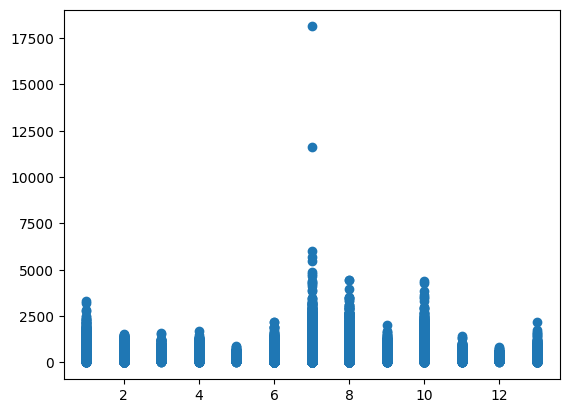

In [24]:
plt.plot(df_without_na['district'], df_without_na['totalPrice'], ls='', marker='o')

Since house pricing doesn't have a upper limit, we are going to end up with a positively skew, a solution to that is to use log so we can have a normal skew.

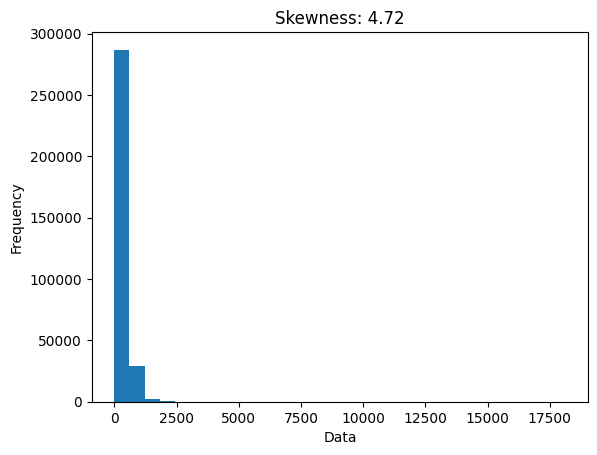

In [25]:
skewness = skew(df_without_na['totalPrice'])

plt.hist(df_without_na['totalPrice'], bins=30)

plt.xlabel("Data")
plt.ylabel("Frequency")
plt.title(f"Skewness: {skewness:.2f}")

plt.show()

Since the scale between some features have different magnitudes, eg price and living room, we can use StandardScaling to put them into the same scale.

For feature encoding, all features are numeric now, so no need for feature encoding.

### **1.4 Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.**

In [26]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [27]:
target = "totalPrice"

X = df_without_na.drop(columns=[target])
y = df_without_na[target].copy()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [29]:
standard_scaler = StandardScaler()
poly_feat = PolynomialFeatures(degree=2, include_bias=False)

In [30]:
linear_estimator = Pipeline([
    ("poly_feat", poly_feat),
    ("linear_regression", LinearRegression())
])
linear_estimator.fit(X_train, y_train)

Pipeline(steps=[('poly_feat', PolynomialFeatures(include_bias=False)),
                ('linear_regression', LinearRegression())])

In [31]:
linear_y_pred = linear_estimator.predict(X_test)
linear_score = r2_score(y_test, linear_y_pred)
linear_score

0.9999999995335449

Let's find the best alpha for ridge

In [32]:
ridge_alphas = np.geomspace(0.06, 6.0, 20)
ridge_scores = []
for alpha in ridge_alphas:
  ridge_estimator = Pipeline([
      ("scaler", StandardScaler()),
      ("poly_feat", poly_feat),
      ("ridge_regression", Ridge(alpha=alpha, max_iter=100000))
  ])
  ridge_estimator.fit(X_train, y_train)
  ridge_y_pred = ridge_estimator.predict(X_test)
  ridge_scores.append(r2_score(y_test, ridge_y_pred))

The difference is really small but the best alpha ends up being 0.060000000000000

In [33]:
ridge_df = pd.DataFrame(ridge_scores, ridge_alphas)
pd.set_option('display.float_format', '{:.15f}'.format)
ridge_df.sort_values(by=0)

,0
6.000000000000000,0.999999992523095
4.708559822108766,0.999999995210130
3.695089266396157,0.999999996866443
2.899758143143051,0.999999997887555
2.275614114439350,0.999999998517199
1.785810864978791,0.999999998905561
1.401432881454073,0.999999999145189
1.099788426499461,0.999999999293117
0.863069932972598,0.999999999384491
0.677302735010813,0.999999999440978


Let's find the best alpha for lasso

In [34]:
lasso_alphas = np.geomspace(1e-9, 1e0, num=10)
lasso_scores = []
for alpha in lasso_alphas:
  ridge_estimator = Pipeline([
      ("scaler", StandardScaler()),
      ("poly_feat", poly_feat),
      ("lasso_regression", Lasso(alpha=alpha, max_iter=100000))
  ])
  ridge_estimator.fit(X_train, y_train)
  lasso_scores.append(ridge_estimator.score(X_test, y_test))

Same thing with lasso, the difference is really small between alphas but the best one is 0.010000000000000

In [35]:
lasso_df = pd.DataFrame(lasso_scores, lasso_alphas)
pd.set_option('display.float_format', '{:.15f}'.format)
lasso_df.sort_values(by=0)

,0
1.000000000000000,0.999924394753132
0.100000000000000,0.999999243103168
0.001000000000000,0.999999498428922
0.000100000000000,0.999999554332515
0.000000001000000,0.999999562068183
0.000000010000000,0.999999562069312
0.000000100000000,0.999999562080601
0.000001000000000,0.999999562193452
0.000010000000000,0.999999563318839
0.010000000000000,0.999999991410358


In [36]:
max(0.999999991410358, 0.999999999532529, 0.9999999995335449)

0.9999999995335449

### **1.5 A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.**

Based on the r2_score, the vanilla linear regression had a better result, we can also consider that not much was done to the data in terms of what best suit each model, so based on what was done, the difference between the three models was really small, i think what can decide is better tweak the data to each model.

### **1.6 Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.**

For this dataset we can se that smaller alphas had better results in both Lasso and Ridge.
With what was done to the data, regularization and feature selection didn't had such a big impact on the results, since linear regression had a better r2_score.

### **1.7 Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.**

This dataset required a significant amount of cleaning, there were a lot of fields and records with broken values, but no outliers where to be find.
We could revisit the features and find which one had more weight than the others, and if in the future the dataset has the parameter 'floor' adjusted, we can see if it has a big impact on the relation with the other features.